In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import copy
import json

from viz_functions import *

# Grid test viz

In [2]:
grid_test_df = pd.read_csv('./Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/GridSimulations/Grid-run-0-1560sims.csv')

In [3]:
grid_test_df

,x,y,cell,cell_x,cell_y,opt_traj,point_id,steps_taken,extra_steps
0,61,21,0,65.0,20.0,10,7642,29,19
1,64,15,0,65.0,20.0,19,5479,56,37
2,62,18,0,65.0,20.0,14,6560,827,813
3,66,19,0,65.0,20.0,17,6925,40,23
4,62,16,0,65.0,20.0,16,5838,638,622
...,...,...,...,...,...,...,...,...,...
1555,313,40,77,312.5,40.0,263,14753,318,55
1556,311,42,77,312.5,40.0,263,15473,380,117
1557,311,41,77,312.5,40.0,262,15112,360,98
1558,314,37,77,312.5,40.0,261,13671,372,111


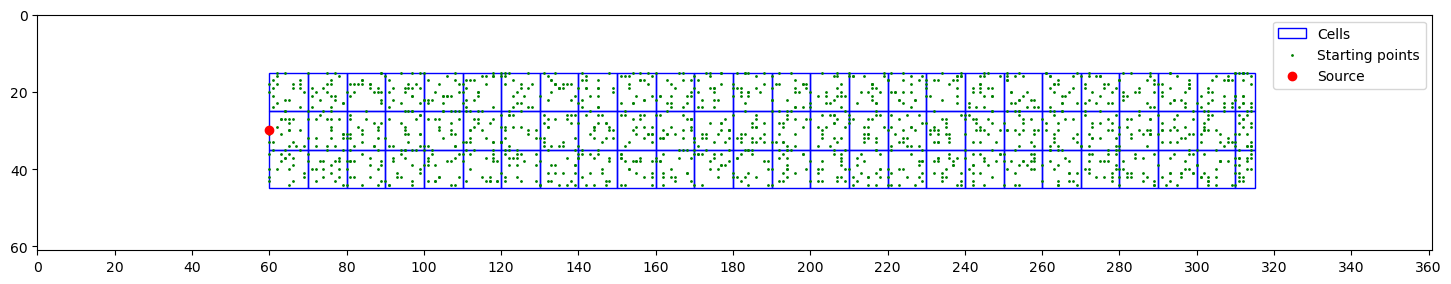

In [17]:
fig, ax = plt.subplots(figsize=(18,5))

ax.set_xlim(0,361)
ax.set_xticks(np.arange(0,361,20))
ax.set_ylim(0,61)
ax.set_yticks(np.arange(0,61,20))
ax.invert_yaxis()

ax.set_aspect('equal')

# Draw cells
added_legend = False
for y in range(15,45, 10):
    for x in range(60, 315, 10):
        if not added_legend:
            ax.add_patch(Rectangle([x, y], width=(10 if x+10 < 315 else 315-x), height=10, linewidth=1, edgecolor='b', facecolor='none', label='Cells'))
            added_legend = True
        else:
            ax.add_patch(Rectangle([x, y], width=(10 if x+10 < 315 else 315-x), height=10, linewidth=1, edgecolor='b', facecolor='none'))

# Scatter starting points
ax.scatter(grid_test_df['x'].to_list(), grid_test_df['y'].to_list(), s=1, color='green', label='Starting points')

# Goal
ax.scatter(x=60, y=30, color='red', label='Source')

ax.legend()

# Run-3 perf

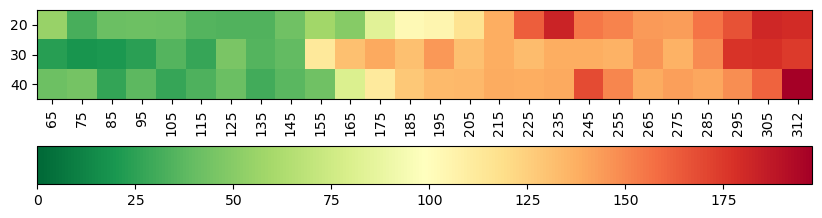

In [13]:
fig, ax = plt.subplots(1, figsize=(10,4))
im = plot_grid_extra_steps_from_file('./Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/GridSimulations/Grid-run-3-1560sims.csv', ax=ax)
plt.colorbar(im, ax=ax, location='bottom', orientation='horizontal')

# Visualize extra steps

## Ground only

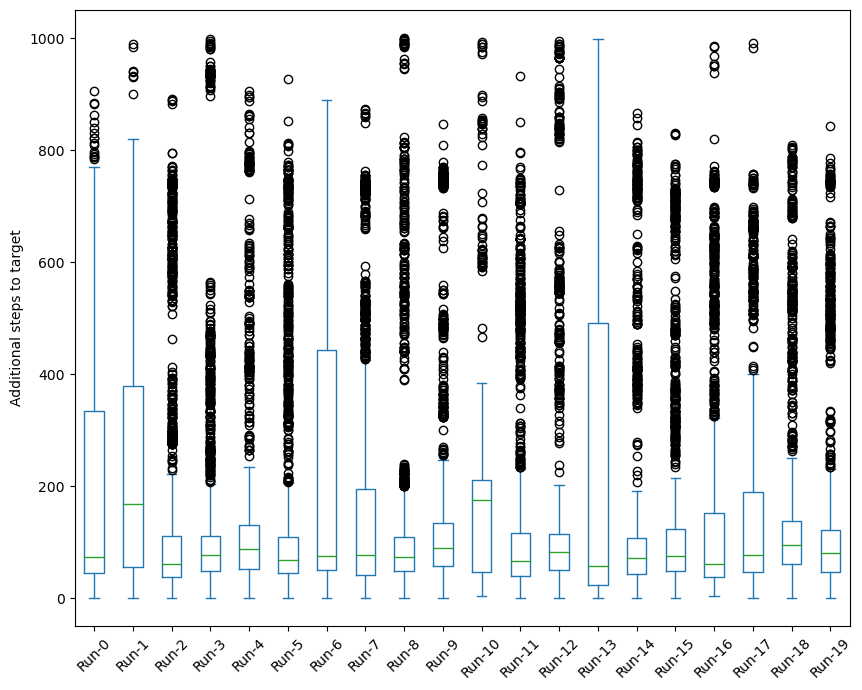

In [2]:
ground_file = './Test_Ground_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231127_185934/grid_extra_steps.csv'
fig, ax = plt.subplots(figsize=(10,8))
plot_extra_steps_from_file(ground_file, ax=ax)

## Ground and air

### Test 11-21

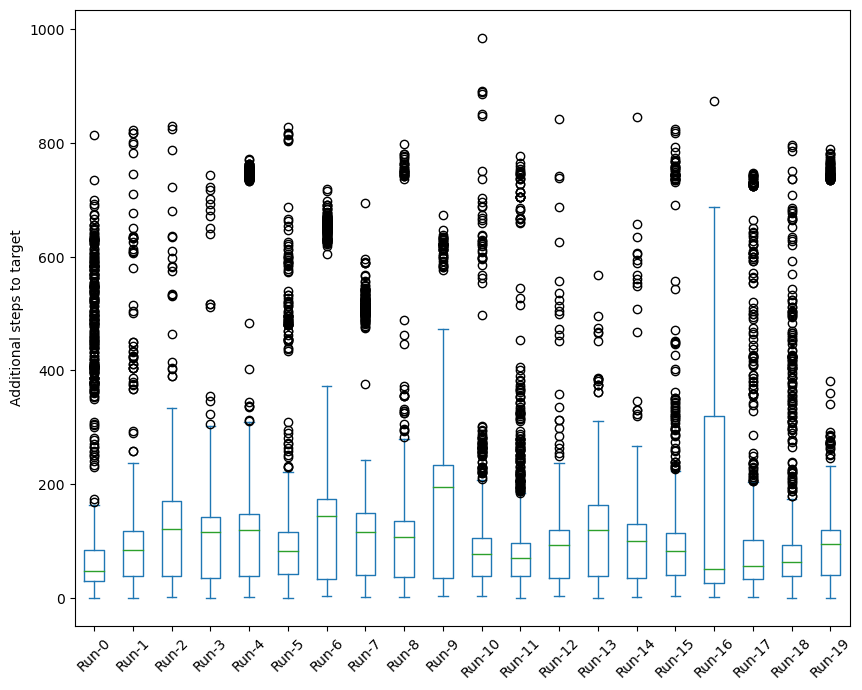

In [3]:
file = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/grid_extra_steps.csv'
fig, ax = plt.subplots(figsize=(10,8))
plot_extra_steps_from_file(file, ax=ax)

## Comparing ground vs ground air averages

Text(0, 0.5, 'Average additional steps to target')

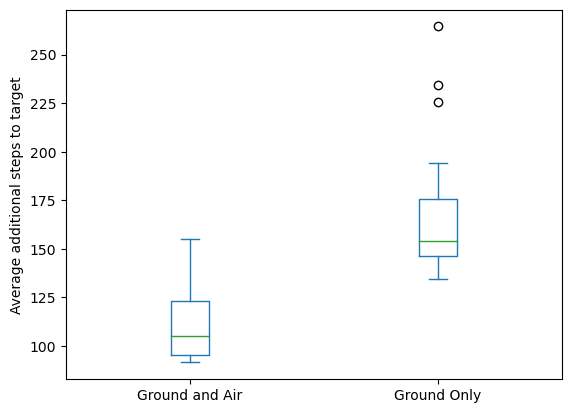

In [4]:
ground_file = './Test_Ground_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231127_185934/grid_extra_steps.csv'
groundair_file = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/grid_extra_steps.csv'

ground_df = pd.read_csv(ground_file)
groundair_df = pd.read_csv(groundair_file)

if 'Average' in ground_df:
    ground_df.drop(columns='Average', inplace=True)

if 'Average' in groundair_df:
    groundair_df.drop(columns='Average', inplace=True)

ground_averages = np.average(ground_df.to_numpy(), axis=1)
groundair_averages = np.average(groundair_df.to_numpy(), axis=1)

pd.DataFrame({'Ground and Air': groundair_averages, 'Ground Only': ground_averages}).plot(kind='box')
plt.ylabel('Average additional steps to target')

## Vertical wrap only ground and air

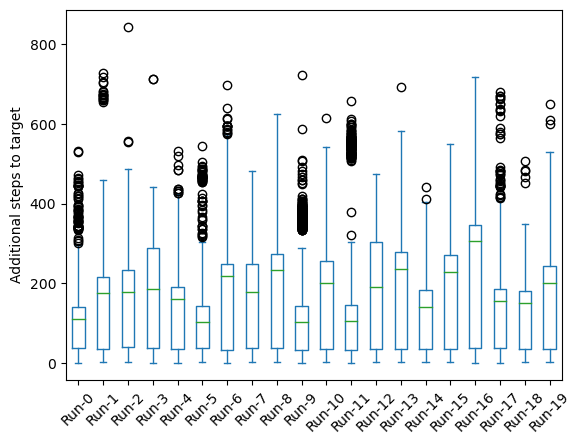

In [5]:
file = './Test_VertGroundAir_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231125_230106/grid_extra_steps.csv'
plot_extra_steps_from_file(file)

## Vertical wrap only ground only

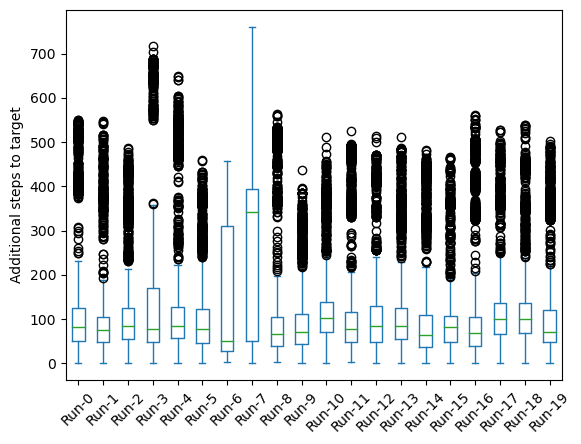

In [6]:
file = './Test_VertGround_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231125_230820/grid_extra_steps.csv'
plot_extra_steps_from_file(file)

## Comparing ground vs ground air averages

Text(0, 0.5, 'Average additional steps to target')

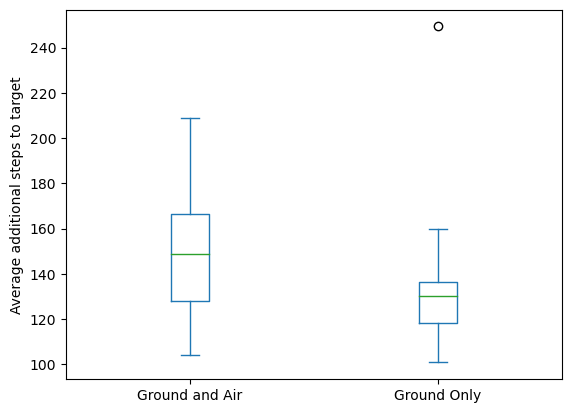

In [7]:
vert_ground_file = './Test_VertGround_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231125_230820/grid_extra_steps.csv'
vert_groundair_file = './Test_VertGroundAir_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231125_230106/grid_extra_steps.csv'

vert_ground_df = pd.read_csv(vert_ground_file)
vert_groundair_df = pd.read_csv(vert_groundair_file)

if 'Average' in vert_ground_df:
    vert_ground_df.drop(columns='Average', inplace=True)

if 'Average' in vert_groundair_df:
    vert_groundair_df.drop(columns='Average', inplace=True)

vert_ground_averages = np.average(vert_ground_df.to_numpy(), axis=1)
vert_groundair_averages = np.average(vert_groundair_df.to_numpy(), axis=1)

pd.DataFrame({'Ground and Air': vert_groundair_averages, 'Ground Only': vert_ground_averages}).plot(kind='box')
plt.ylabel('Average additional steps to target')

## All wrap or vert only ground and air

Text(0, 0.5, 'Average additional steps to target')

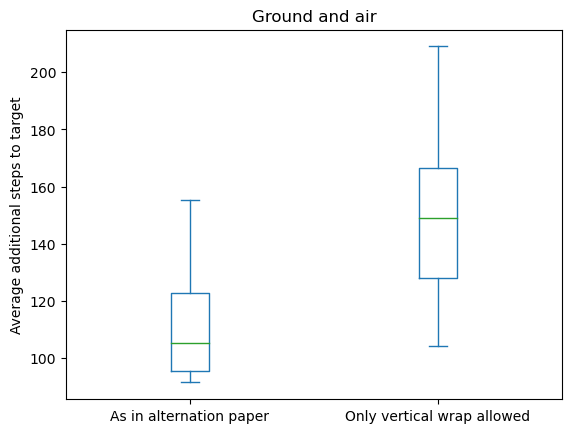

In [8]:
df = pd.DataFrame({'As in alternation paper': groundair_averages, 'Only vertical wrap allowed': vert_groundair_averages})

fig, ax = plt.subplots()
ax.set_title('Ground and air')
df.plot(kind='box', ax=ax)
plt.ylabel('Average additional steps to target')

Text(0, 0.5, 'Average additional steps to target')

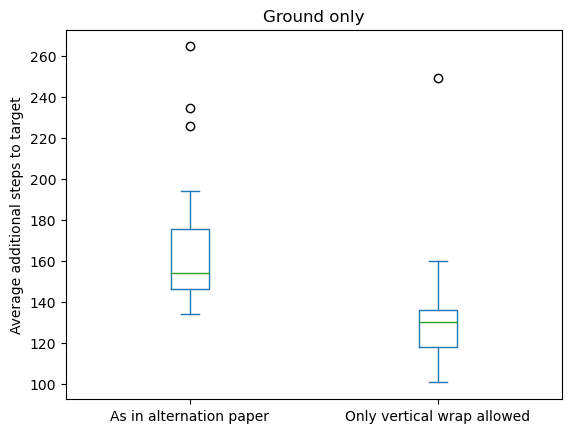

In [9]:
df = pd.DataFrame({'As in alternation paper': ground_averages, 'Only vertical wrap allowed': vert_ground_averages})

fig, ax = plt.subplots()
ax.set_title('Ground only')
df.plot(kind='box', ax=ax)
plt.ylabel('Average additional steps to target')

## Progress plot

In [10]:
averages_dict = {}
st_devs_dict = {}

Text(0.5, 0, 'Training iteration')

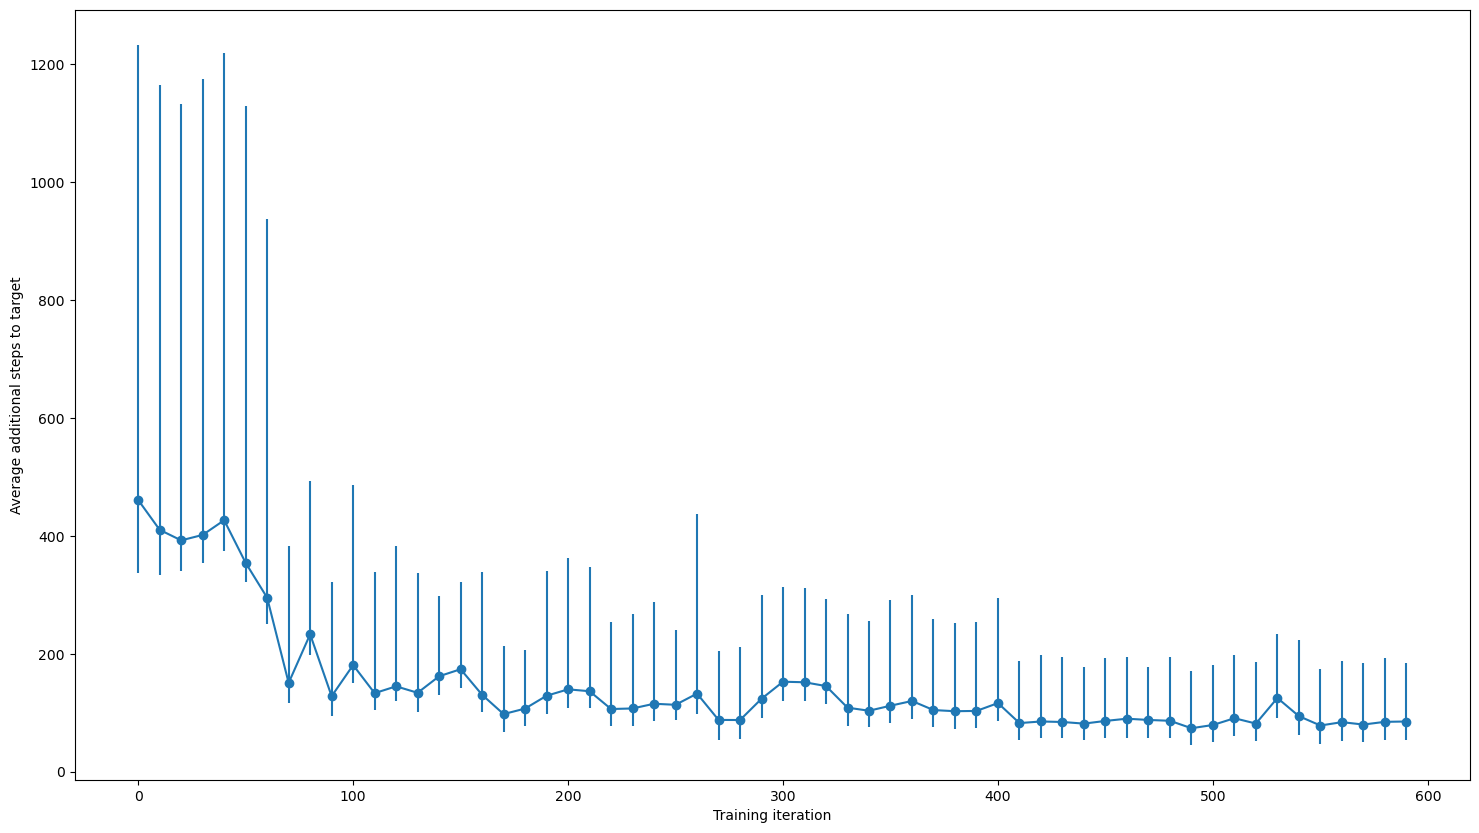

In [11]:
# Longer process
prog_groundair_file = './Test_LongerGroundAir_fsvi_600it_100exp_099g_1e-06eps_60run_0sim_20231127_154030/grid_extra_steps.csv'

prog_groundair_df = pd.read_csv(prog_groundair_file)

averages = np.average(np.array(prog_groundair_df), axis=1)
st_dev = np.std(np.array(prog_groundair_df), axis=1)
q1_dev = np.percentile(np.array(prog_groundair_df), q=20, axis=1)
q3_dev = np.percentile(np.array(prog_groundair_df), q=80, axis=1)

xs = np.arange(0,len(averages)*10,10)
plt.figure(figsize=(18,10))
# plt.title('Longer process')
plt.errorbar(xs, averages, yerr=np.array([q1_dev, q3_dev]), fmt='-o')
plt.ylabel('Average additional steps to target')
plt.xlabel('Training iteration')

In [12]:
np.array([q1_dev, q3_dev]).shape

(2, 60)

In [13]:
averages_dict['ground_air'] = averages[:30]
st_devs_dict['ground_air'] = st_dev[:30]

In [14]:
files = {
    'ground': './Test_ProgGround_fsvi_300it_100exp_099g_1e-06eps_30run_300sim_20231126_010344/grid_extra_steps.csv',
    'vert_groundair': './Test_ProgVertGroundAir_fsvi_300it_100exp_099g_1e-06eps_30run_300sim_20231126_010553/grid_extra_steps.csv',
    'vert_ground': './Test_ProgVertGround_fsvi_300it_100exp_099g_1e-06eps_30run_300sim_20231126_010508/grid_extra_steps.csv',
}

for k, file in files.items():
    prog_df = pd.read_csv(file)

    averages = np.average(np.array(prog_df), axis=1)
    st_dev = np.std(np.array(prog_df), axis=1)

    averages_dict[k] = averages
    st_devs_dict[k] = st_dev

Text(0.5, 0, 'Training time')

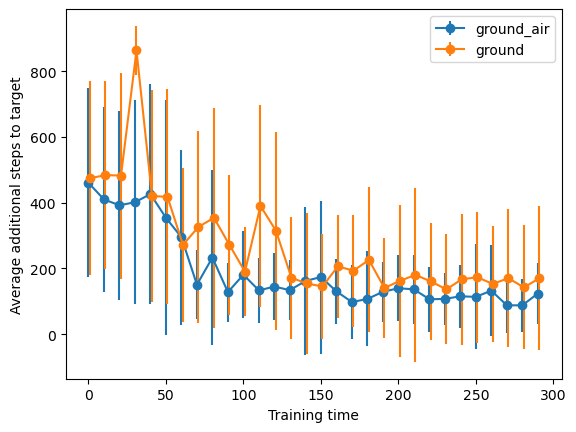

In [15]:
xs = np.arange(0, 300, 10)

i = 0
for k, v in averages_dict.items():
    if 'vert' in k:
        continue

    st_dev = st_devs_dict[k]
    plt.errorbar(xs + i, v, yerr=st_dev, fmt='-o', label=k)

    i += 1

plt.legend()
plt.ylabel('Average additional steps to target')
plt.xlabel('Training time')

Text(0.5, 0, 'Training time')

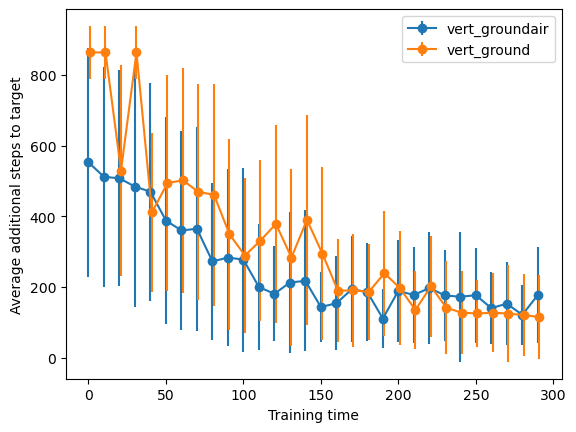

In [16]:
xs = np.arange(0, 300, 10)

i = 0
for k, v in averages_dict.items():
    if 'vert' not in k:
        continue

    st_dev = st_devs_dict[k]
    plt.errorbar(xs + i, v, yerr=st_dev, fmt='-o', label=k)

    i += 1

plt.legend()
plt.ylabel('Average additional steps to target')
plt.xlabel('Training time')

# Run stats

In [17]:
stats_file = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/runs_stats.csv'
df = pd.read_csv(stats_file)

In [18]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
run & avg_beliefs & time & alpha_vectors & iterations \\
\midrule
0 & 84.760000 & 193.955800 & 7402 & 291 \\
1 & 82.020000 & 205.884400 & 7194 & 300 \\
2 & 85.260000 & 205.506500 & 7282 & 279 \\
3 & 84.240000 & 191.955500 & 6737 & 284 \\
4 & 85.870000 & 213.257800 & 7069 & 289 \\
5 & 85.260000 & 219.833000 & 7583 & 300 \\
6 & 85.560000 & 210.425300 & 7234 & 300 \\
7 & 85.080000 & 169.391100 & 6491 & 269 \\
8 & 80.220000 & 215.388000 & 7221 & 300 \\
9 & 82.200000 & 200.313100 & 7045 & 300 \\
10 & 83.150000 & 224.501800 & 7659 & 300 \\
11 & 83.760000 & 220.985300 & 7469 & 300 \\
12 & 85.030000 & 222.125700 & 7896 & 298 \\
13 & 86.510000 & 215.072200 & 7008 & 300 \\
14 & 86.220000 & 217.044000 & 7496 & 300 \\
15 & 84.390000 & 180.252400 & 6729 & 275 \\
16 & 87.540000 & 224.529700 & 7760 & 291 \\
17 & 82.350000 & 192.362900 & 7018 & 286 \\
18 & 82.400000 & 191.910100 & 6913 & 276 \\
19 & 84.320000 & 198.791200 & 6976 & 300 \\
\bottomrule
\end{tabular}



# Grid performance plots

In [19]:
grid_sim_folder = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/GridSimulations/'

In [20]:
import matplotlib as mpl

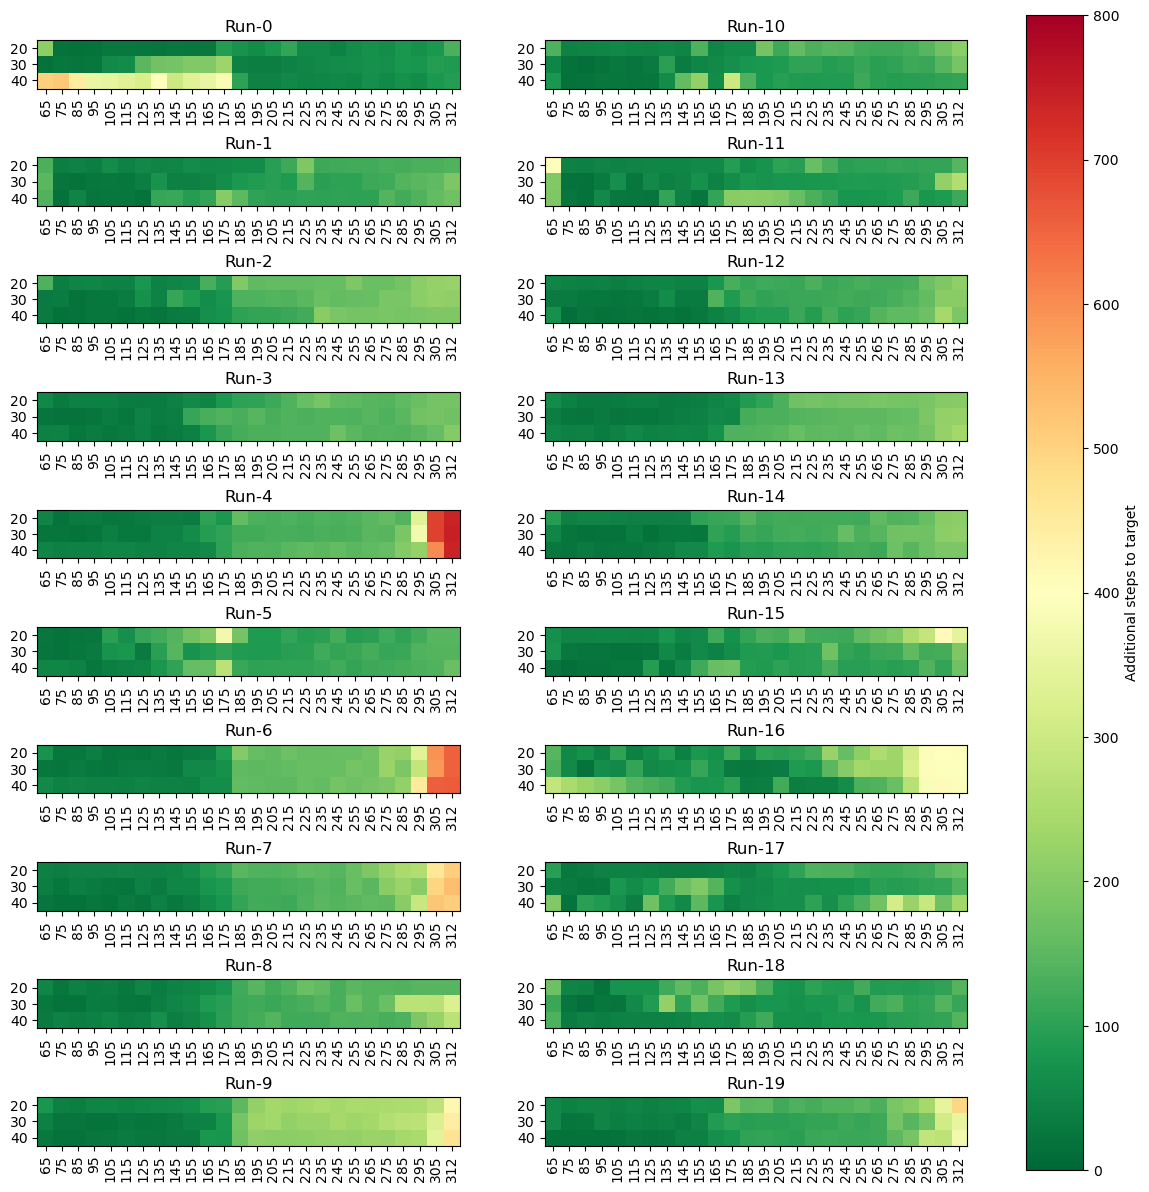

In [43]:
fig, axes = plt.subplots(10,2, figsize=(15,15))

for i in range(20):
    ax = axes[i%10, int(i/10)]
    ax.set_title(f'Run-{i}')
    im = plot_grid_extra_steps_from_file(grid_sim_folder + f'Grid-run-{i}-1560sims.csv', vmax=800, ax=ax)

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Additional steps to target')

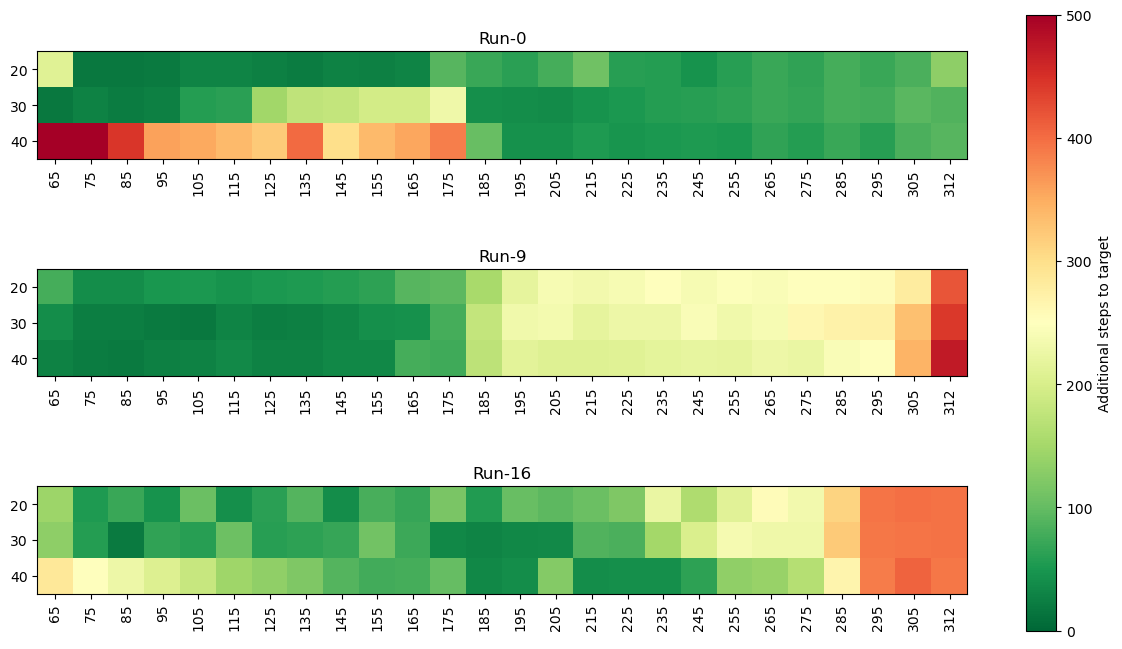

In [47]:
fig, axes = plt.subplots(3,1, figsize=(15,8))

for i, run_i in enumerate([0,9,16]):
    ax = axes[i]
    ax.set_title(f'Run-{run_i}')
    im = plot_grid_extra_steps_from_file(grid_sim_folder + f'Grid-run-{run_i}-1560sims.csv', vmax=500, ax=ax)

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Additional steps to target')

# All runs paths

In [20]:
def path_plot_ax(sim_hist, ax, legend=False):
    # Get cpu model
    model = sim_hist.model.cpu_model

    # Plot setup
    env_shape = model.cpu_model.state_grid.shape
    ax.set_xlim(0, env_shape[1])
    ax.set_ylim(env_shape[0], 0)

    # Start
    start_coord = sim_hist.grid_point_sequence[0]
    ax.scatter(start_coord[1], start_coord[0], c='green', label='Start')

    # Goal
    goal_coord = np.array([np.argwhere(model.state_grid == g)[0].tolist() for g in model.end_states])
    ax.scatter(goal_coord[:,1], goal_coord[:,0], c='red', label='Goal')

    # Path
    seq = np.array(sim_hist.grid_point_sequence)
    ax.plot(seq[:,1], seq[:,0], zorder=-1, c='black', label='Path')

    # Something sensed
    something_obs_id = model.observation_labels.index('something')
    obs_ts = np.where(np.array(sim_hist.observations) == something_obs_id)
    points_obs = seq[obs_ts[0],:]
    ax.scatter(points_obs[:,1], points_obs[:,0], zorder=1, label='Something observed')

    # Points sniff
    sniff_air_action_id = -1
    for i, al in enumerate(model.action_labels):
        if 'air' in al.lower():
            sniff_air_action_id = i
    sniff_in_air = np.where(np.array(sim_hist.actions) == sniff_air_action_id)
    points_sniff = seq[sniff_in_air[0],:]
    if len(points_sniff) > 0:
        ax.scatter(points_sniff[:,1], points_sniff[:,0], zorder=2, marker='x', label='Sniff in the air')

    ax.set_aspect('equal')

    # Generate legend
    if legend:
        ax.legend()

In [16]:
model = Model.load_from_file('./Models/Alt_Wrap_GroundAir.pck')

In [27]:
ground_air_test_folder = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/'

steps_count = 500
run_sims = []

for i in range(20):
    simulations_df = pd.read_csv(ground_air_test_folder + f'Simulations/run-{i}-sims.csv', index_col=0)

    for col in simulations_df.columns:
        sim_steps = simulations_df[col].tolist()
        sim_steps = [json.loads(step) for step in sim_steps if isinstance(step, str)]

        # Creation of simulation history
        sim_hist = SimulationHistory(model, sim_steps[0]['s'], Belief(model))

        sim_hist.states = [step['s'] for step in sim_steps][:steps_count]
        sim_hist.actions = [step['a'] for step in sim_steps][:steps_count-1]
        sim_hist.observations = [step['o'] for step in sim_steps][:steps_count-1]
        sim_hist.rewards = [step['r'] for step in sim_steps][:steps_count-1]

        # Adding it to set
        run_sims.append(sim_hist)

        break

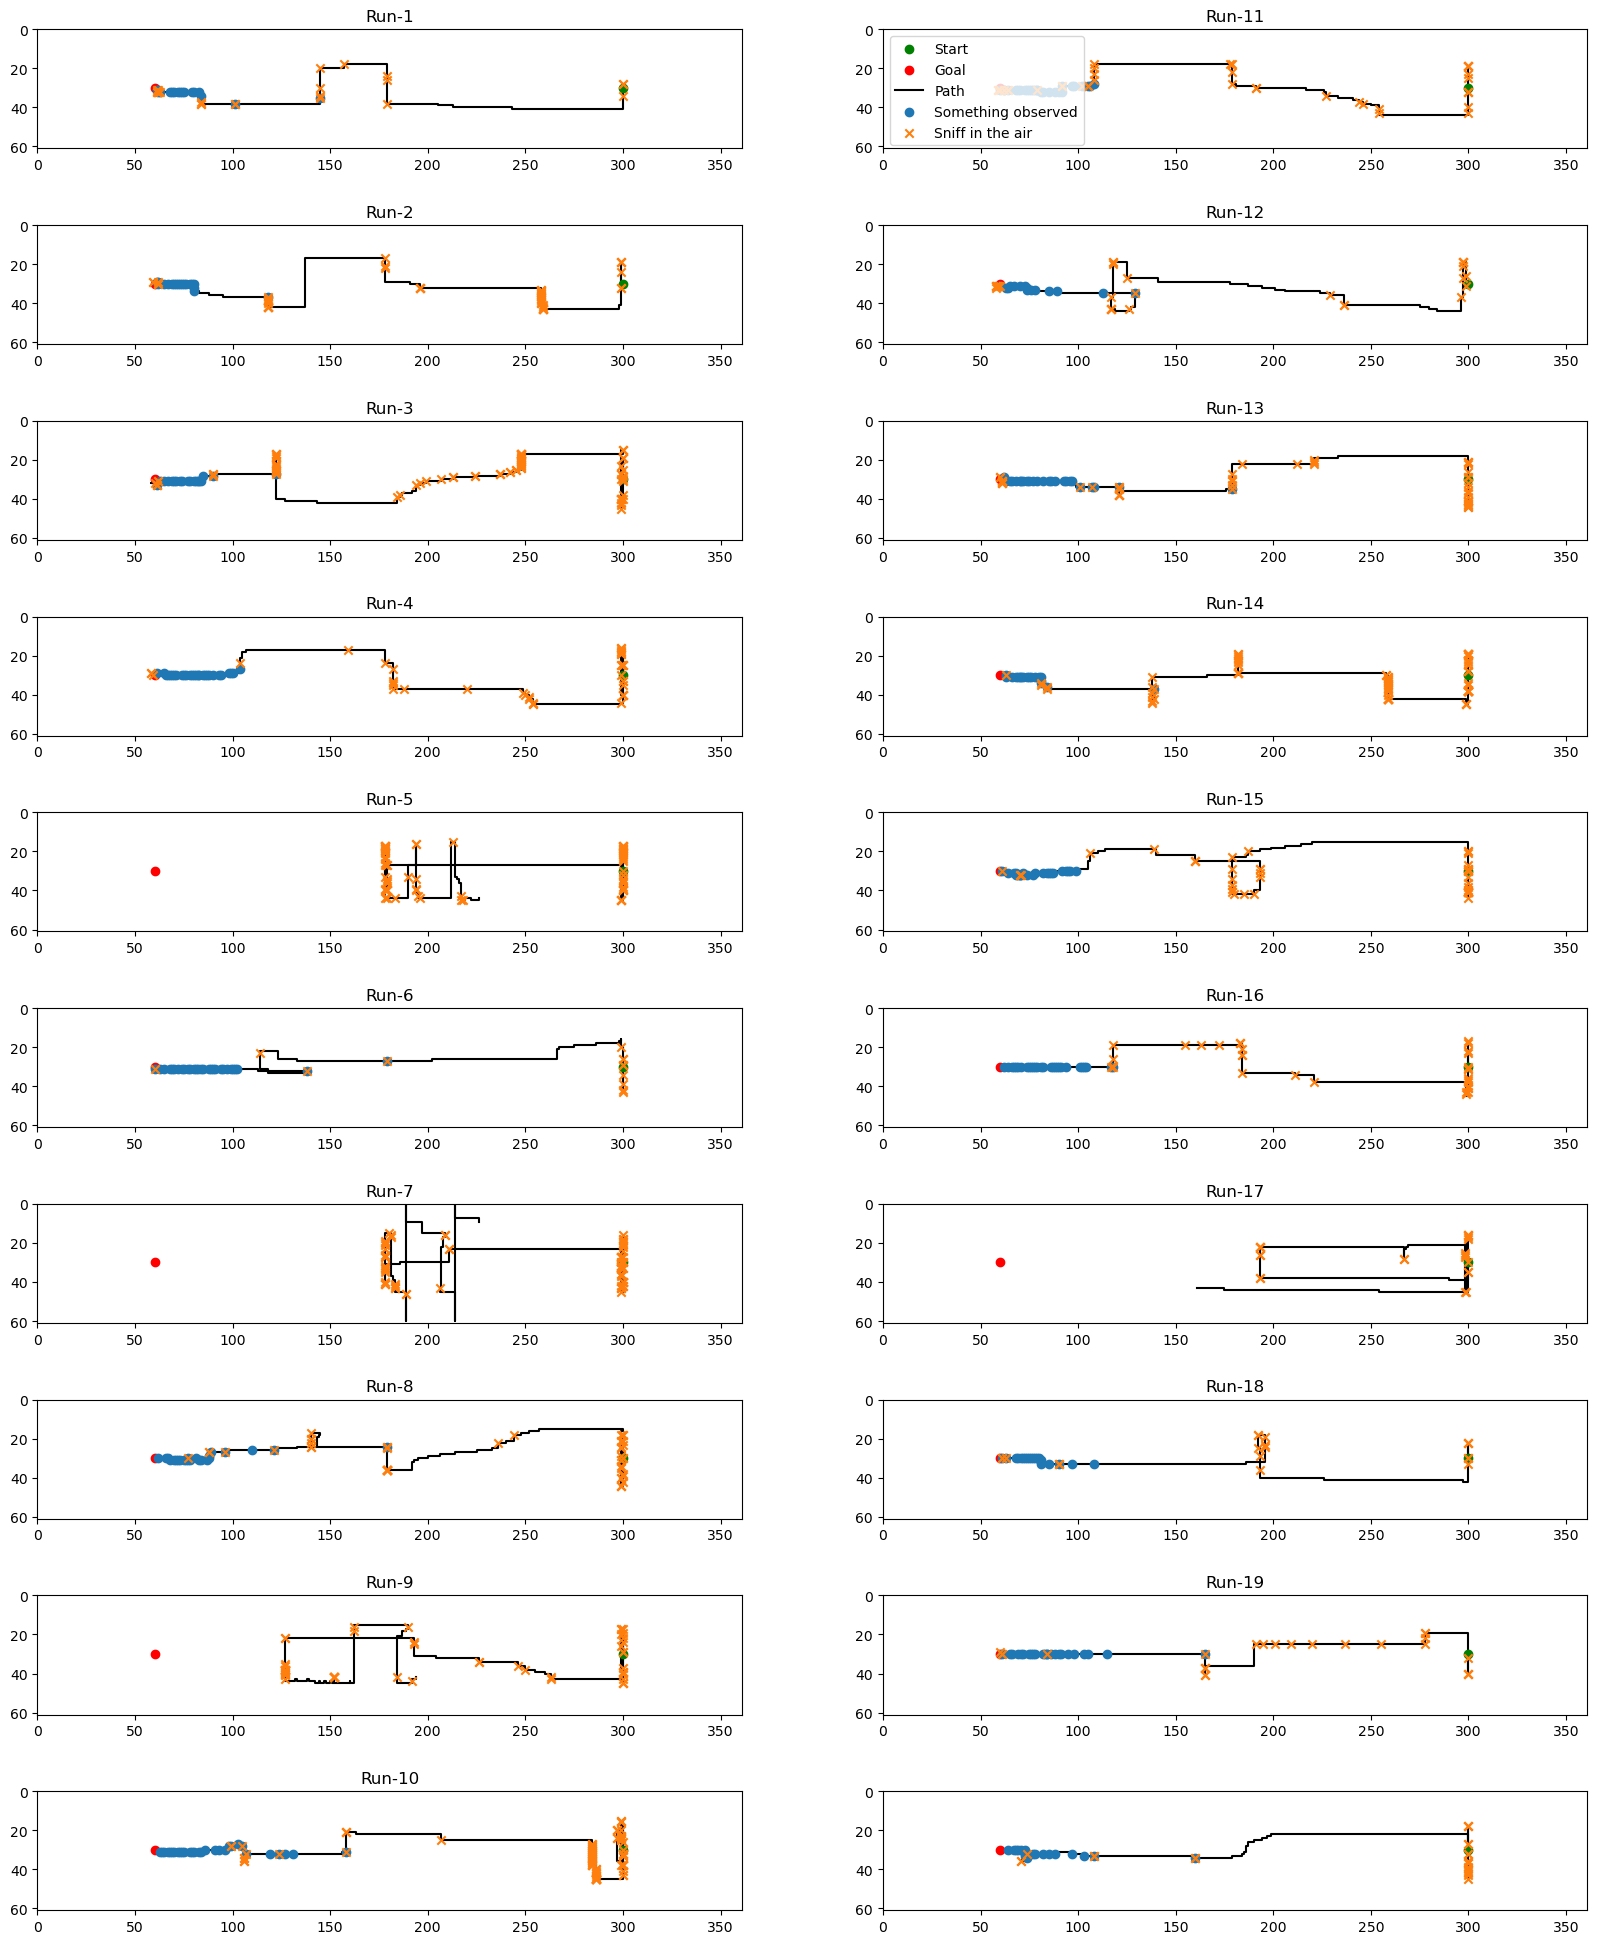

In [31]:
fig, axes = plt.subplots(10,2, figsize=(20,25))

for i in range(20):
    ax.set_title(f'Run-{i}')
    ax = axes[i%10, int(i/10)]
    path_plot_ax(run_sims[i], ax, i==10)

# Runtimes plots

In [ ]:
runtimes_df = pd.read_csv('./Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/single_run_stats.csv')